In [4]:
!pip install autogluon --upgrade
!pip install torch torchvision torchaudio --upgrade

  Using cached torch-2.3.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached triton-2.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.2/148.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.0/410.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━

  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached torchaudio-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.3 kB)
Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl (797.1 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (209.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 9.6 MB/s eta 0:00:00
Using cached torchaudio-2.4.1-cp310-cp310-manylinux1_x86_64.whl (3.4 MB)
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-c

In [1]:
%matplotlib inline

import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(123)

In [2]:
from autogluon.core.utils.loaders import load_pd
train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet')
test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet')
subsample_size = 1000
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head(10)

,sentence,label
43787,very pleasing at its best moments,1
16159,", american chai is enough to make you put away...",0
59015,too much like an infomercial for ram dass 's l...,0
5108,a stirring visual sequence,1
67052,cool visual backmasking,1
35938,hard ground,0
49879,"the striking , quietly vulnerable personality ...",1
51591,pan nalin 's exposition is beautiful and myste...,1
56780,wonderfully loopy,1
28518,"most beautiful , evocative",1


In [5]:
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
predictor = MultiModalPredictor(label='label', eval_metric='acc', path=model_path)
predictor.fit(train_data, time_limit=180)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.4.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       9.60 GB / 12.67 GB (75.7%)
Disk Space Avail:   63.33 GB / 107.72 GB (58.8%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/tmp/b9fb73df015e4

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 3: 'val_acc' reached 0.54500 (best 0.54500), saving model to '/content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/epoch=0-step=3.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:04:32. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [6]:
test_score = predictor.evaluate(test_data)
print(test_score)

Predicting: |          | 0/? [00:00<?, ?it/s]

{'acc': 0.5103211009174312}


In [7]:
test_score = predictor.evaluate(test_data, metrics=['acc', 'f1'])
print(test_score)

Predicting: |          | 0/? [00:00<?, ?it/s]

{'acc': 0.5103211009174312, 'f1': 0.6613798572561458}


In [8]:
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

Predicting: |          | 0/? [00:00<?, ?it/s]

"Sentence": it's a charming and often affecting journey. "Predicted Sentiment": 1
"Sentence": It's slow, very, very, very slow. "Predicted Sentiment": 0


In [9]:
probs = predictor.predict_proba({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Class-Probabilities":', probs[0])
print('"Sentence":', sentence2, '"Predicted Class-Probabilities":', probs[1])

Predicting: |          | 0/? [00:00<?, ?it/s]

"Sentence": it's a charming and often affecting journey. "Predicted Class-Probabilities": [0.34515423 0.6548457 ]
"Sentence": It's slow, very, very, very slow. "Predicted Class-Probabilities": [0.5155579  0.48444217]


In [10]:
test_predictions = predictor.predict(test_data)
test_predictions.head()

Predicting: |          | 0/? [00:00<?, ?it/s]

,label
0,1
1,1
2,1
3,1
4,0


In [11]:
loaded_predictor = MultiModalPredictor.load(model_path)
loaded_predictor.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: /content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/model.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[0.34515423, 0.6548457 ],
       [0.5155579 , 0.48444217]], dtype=float32)

In [12]:
new_model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
loaded_predictor.save(new_model_path)
loaded_predictor2 = MultiModalPredictor.load(new_model_path)
loaded_predictor2.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: /content/tmp/77abd10334014a69869f15dea2d78e31-automm_sst/model.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[0.34515423, 0.6548457 ],
       [0.5155579 , 0.48444217]], dtype=float32)

In [13]:
embeddings = predictor.extract_embedding(test_data)
print(embeddings.shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(872, 768)


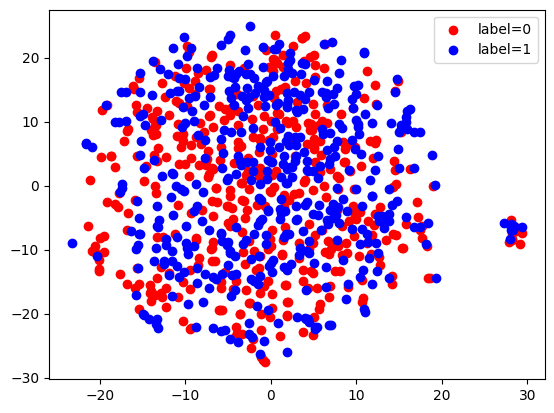

In [14]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=123).fit_transform(embeddings)
for val, color in [(0, 'red'), (1, 'blue')]:
    idx = (test_data['label'].to_numpy() == val).nonzero()
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=color, label=f'label={val}')
plt.legend(loc='best')

In [15]:
!zip -r /content/tmp.zip /content/tmp

  adding: content/tmp/ (stored 0%)
  adding: content/tmp/7b3313c19f8b4610bf7d8de7de17239d-automm_sst/ (stored 0%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/ (stored 0%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/hparams.yaml (deflated 36%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/config.yaml (deflated 58%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/events.out.tfevents.1726293854.1db5fb81e4ab.5181.1 (deflated 42%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/data_processors.pkl (deflated 77%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/assets.json (deflated 44%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/model.ckpt (deflated 7%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/hf_text/ (stored 0%)
  adding: content/tmp/b9fb73df015e4394ad51c393f3c345ab-automm_sst/hf_text/special_tokens_map.json (deflated 42%)
  a